In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image
import random


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, Concatenate

from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination

C:\Users\jiayu\AppData\Local\Temp\ipykernel_32276\269066801.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



OK


In [2]:
SEED = 64

# SET RANDOM SEED FOR REPRODUCIBILITY
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
# Create variable to store dataset name
dataset_name = 'california_housing'
results_path = f'logs/{dataset_name}/MLP_Regression'

In [4]:
df = pd.read_csv(f"../Datasets_benchmark/{dataset_name}.csv")

In [5]:
#MEDV is the objective value in Boston dataset
df_x = df.drop(df.columns[-1],axis=1)
df_y = df[df.columns[-1]]

print(df_y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [6]:
import cv2
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = 123)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123)

In [7]:
attributes = len(X_train.columns)

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [9]:
# Fit the scaler to the training data and transform it
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform the validation and testing data using the fitted scaler
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [36]:
# MLP

model1 = Sequential([
    Input(shape=(attributes,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [37]:
model2 = Sequential([
    Input(shape=(attributes,)),
    Dense(attributes, activation='relu'),
    Dense(attributes/2, activation='relu'),
    Dense(attributes/4, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [38]:
#filters_ffnn = [1024,512,256,128,64,32,16]

dropout = 0.1

ff_inputs = Input(shape = (attributes,))

# * START BRANCH 1
#mlp_1 = Dense(1024, activation='relu')(ff_inputs)
#mlp_1 = BatchNormalization()(mlp_1)
#mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(512, activation='relu')(ff_inputs)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(256, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(128, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(64, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(32, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(16, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

# * START BRANCH 2
#mlp_2 = Dense(1024, activation='relu')(ff_inputs)
#mlp_2 = BatchNormalization()(mlp_2)
#mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(512, activation='relu')(ff_inputs)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(256, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(128, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(64, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(32, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(16, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

merged_tabular = Concatenate(axis=1)([mlp_1, mlp_2])

model_output = Dense(32, activation='relu')(merged_tabular)
model_output = Dense(16, activation='relu')(model_output)
model_output = Dense(1)(model_output)

model3 = Model(inputs=ff_inputs, outputs=model_output)


In [39]:
import tensorflow.keras.backend as K

def r_square(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - SS_res / (SS_tot + K.epsilon())
    return r2

METRICS = [
    tf.keras.metrics.MeanSquaredError(name = 'mse'),
    tf.keras.metrics.MeanAbsoluteError(name = 'mae'),
    tf.keras.metrics.RootMeanSquaredError(name = 'rmse'),
    r_square,
]

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

def compile_and_fit(model, X_train, y_train, X_val, y_val, dataset_name, model_name):

    opt = Adam(learning_rate=1e-3)

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        min_delta=0.001,     # Minimum change in the monitored quantity to qualify as an improvement
        patience=5,          # Number of epochs with no improvement after which training will be stopped
        verbose=1,           # Print messages when the callback takes an action
        mode='min'           # Training will stop when the quantity monitored has stopped decreasing
    )

    
    model.compile(
        loss="mse",
        optimizer=opt,
        metrics=METRICS
    )

    model_history = model.fit(
        x=X_train, y=y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping]
    )

    os.makedirs(f"models/{dataset_name}/{model_name}", exist_ok=True)

    plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
    plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
    plt.legend(loc = 'upper right')
    plt.savefig(f"models/{dataset_name}/{model_name}/loss_plot.png")

    plt.plot(model_history.history['mse'], color = 'red', label = 'mse')
    plt.plot(model_history.history['val_mse'], color = 'green', label = 'val mse')
    plt.legend(loc = 'upper right')
    plt.savefig(f"models/{dataset_name}/{model_name}/mse_plot.png")

    # Save the model
    os.makedirs(f"models/{dataset_name}/{model_name}", exist_ok=True)
    model.save(f"models/{dataset_name}/{model_name}/model_{dataset_name}.keras")

    # Evaluate the model on the training set
    train_scores = model.evaluate(X_train, y_train)

    # Evaluate the model on the validation set
    val_scores = model.evaluate(X_val, y_val)

    # Evaluate the model on the test set
    score_test = model.evaluate(X_test, y_test)

    # Save training, validation, and test scores
    metrics = {
        'train_loss': train_scores[0],
        'train_mse': train_scores[1],
        'train_mae': train_scores[2],
        'train_rmse': train_scores[3],
        'train_r2': train_scores[4],
        'val_loss': val_scores[0],
        'val_mse': val_scores[1],
        'val_mae': val_scores[2],
        'val_rmse': val_scores[3],
        'val_r2': val_scores[4],
        'test_loss': score_test[0],
        'test_mse': score_test[1],
        'test_mae': score_test[2],
        'test_rmse': score_test[3],
        'test_r2': score_test[4]
    }

    # Save metrics to a file
    os.makedirs(f'{results_path}/{model_name}', exist_ok=True)
    with open(f'{results_path}/{model_name}/{dataset_name}_metrics.txt', 'w') as f:
        for key, value in metrics.items():
            f.write(f'{key}: {value}\n')

    return metrics

Epoch 1/50
387/387 [==============================] - 2s 2ms/step - loss: 1.1672 - mse: 1.1672 - mae: 0.7841 - rmse: 1.0804 - r_square: 0.0760 - val_loss: 0.5892 - val_mse: 0.5892 - val_mae: 0.5527 - val_rmse: 0.7676 - val_r_square: 0.5448
Epoch 2/50
387/387 [==============================] - 1s 2ms/step - loss: 0.5771 - mse: 0.5771 - mae: 0.5579 - rmse: 0.7597 - r_square: 0.5372 - val_loss: 0.5799 - val_mse: 0.5799 - val_mae: 0.5323 - val_rmse: 0.7615 - val_r_square: 0.5547
Epoch 3/50
387/387 [==============================] - 1s 2ms/step - loss: 0.5514 - mse: 0.5514 - mae: 0.5431 - rmse: 0.7425 - r_square: 0.5567 - val_loss: 0.5427 - val_mse: 0.5427 - val_mae: 0.5484 - val_rmse: 0.7367 - val_r_square: 0.5770
Epoch 4/50
387/387 [==============================] - 1s 2ms/step - loss: 0.5310 - mse: 0.5310 - mae: 0.5305 - rmse: 0.7287 - r_square: 0.5720 - val_loss: 0.5471 - val_mse: 0.5471 - val_mae: 0.5069 - val_rmse: 0.7396 - val_r_square: 0.5804
Epoch 5/50
387/387 [====================

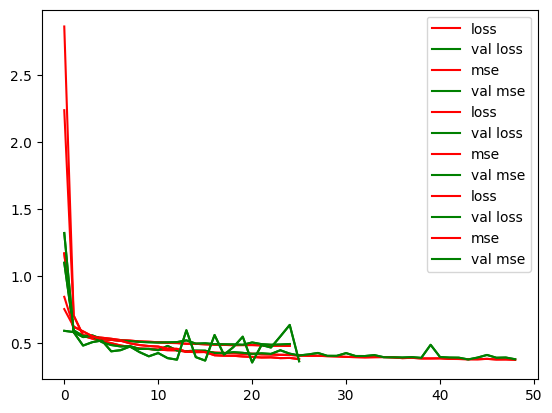

In [41]:
# Example usage with two models
model1_metrics = compile_and_fit(model1, X_train, y_train, X_val, y_val, dataset_name, "Model1")
model2_metrics = compile_and_fit(model2, X_train, y_train, X_val, y_val, dataset_name, "Model2")
model3_metrics = compile_and_fit(model3, X_train, y_train, X_val, y_val, dataset_name, "Model3")

# Print comparison of metrics
print("Model 1 Metrics:", model1_metrics)
print("Model 2 Metrics:", model2_metrics)
print("Model 3 Metrics:", model3_metrics)